# No Show Appointments Analysis

<a id='intro'></a>
## Introduction
 **Purpose** To perform a Data analysis on a sample Dataset of No-show Appointments

This Dataset contains the records of the patients with various types of diseases who booked appointments and did not showed up on their appointment Day.

## Questions

### What factors made people to miss their Appointments ?
1. How many Female and male of different Age Group in the Dataset missed the Appointments ?

2. Did Age, regardless of age_group and sex, determine the patients missing the Appointments ?

3. Did women and children preferred to attend their appointments ?

4. Did the Scholarship of the patients helped in the attendence of their appointments?

<a id='wrangling'></a>
## Data Wrangling


## Data Description

- **Gender** Gender
- **age** Age
- **age_group** Age Group
- **people_showed_up** Patients who attended or missed their appointment (0 = Missed; 1 = Attended)
- **scholarship** Medical Scholarship


In [1]:
# Render plots inline
%matplotlib inline


# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style('dark')

# Read in the Dataset, creat dataframe
appointment_data = pd.read_csv('noshow.csv')

In [2]:
# Print the first few records to review data and format
appointment_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Print the Last few records to review data and format
appointment_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


**Note** PatientId column have exponential values in it.
**Note** No-show displays No if the patient visited and Yes if the Patient did not visited.

## Data Cleanup
From the data description and questions to answer, I've determined that some of the dataset columns are not necessary for the analysis process and will therefore be removed. This will help to process the Data Analysis Faster.

- PatientId
- ScheduledDay
- Sms_received
- AppointmentID
- AppointmentDay

i'll take a 3 step approach to data cleanup

1. Identify and remove duplicate entries
2. Remove unnecessary columns
3. Fix missing and data format issues

Step 1 - Removing Duplicate entries
Concluded that no duplicates entries exists, based on the tests below

In [4]:
# Identify and remove duplicate entries
appointment_data_duplicates = appointment_data.duplicated()
print 'Number of duplicate entries is/are {}'.format(appointment_data_duplicates.sum())

Number of duplicate entries is/are 0


In [5]:
# Lets make sure that this is working
duplication_test = appointment_data.duplicated('Age').head()
print 'Number of entries with duplicate age in top entries are {}'.format(duplication_test.sum())
appointment_data.head()

Number of entries with duplicate age in top entries are 2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Step 2 - Remove unnecessary columns**

Columns(PatientId, ScheduledDay, Sms_received, AppointmentID, AppointmentDay) removed

In [6]:
# Create new dataset without unwanted columns
clean_appointment_data = appointment_data.drop(['PatientId','ScheduledDay','SMS_received','AppointmentID','AppointmentDay'], axis=1)
clean_appointment_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


**Step 3 - Fix any missing or data format issues**
Concluded that there is no missing data

In [7]:
# Calculate number of missing values
clean_appointment_data.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
No-show          0
dtype: int64

In [8]:
# Taking a look at the datatypes
clean_appointment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
No-show          110527 non-null object
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


## Data Exploration And Visualization

In [9]:
# Looking at some typical descriptive statistics
clean_appointment_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [10]:
# Age minimum at -1.0 looks a bit weird so give a closer look
clean_appointment_data[clean_appointment_data['Age'] == -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,No


In [142]:
# Create AgeGroups for further Analysis
'''bins = [0, 25, 50, 75, 100, 120]
group_names = ['0-25', '25-50', '50-75', '75-100', '100-120']
clean_appointment_data['age-group'] = pd.cut(clean_appointment_data['Age'], bins, labels=group_names)
clean_appointment_data.head()'''
clean_appointment_data['Age_rounded'] = np.round(clean_appointment_data['Age'], -1)


categories_dict = {0: '0-5',
                   10: '5-15',
                   20: '15-25',
                    30 : '25-35',
                    40 : '35-45',
                    50 : '45-55',
                   60: '55-65',
                    70 : '65-75',
                    80 : '75-85',
                  90: '85-95',
                  100: '95-105',
                  120: '105-115'}

clean_appointment_data['age_group'] = clean_appointment_data['Age_rounded'].map(categories_dict)

In [143]:
clean_appointment_data['age_group']

0         55-65
1         55-65
2         55-65
3          5-15
4         55-65
5         75-85
6         15-25
7         35-45
8         15-25
9         15-25
10        25-35
11        25-35
12        15-25
13        25-35
14        45-55
15        15-25
16        45-55
17        35-45
18        25-35
19        45-55
20        25-35
21          0-5
22         5-15
23        45-55
24        55-65
25        45-55
26        35-45
27          0-5
28        45-55
29        25-35
          ...  
110497    75-85
110498    55-65
110499    65-75
110500    55-65
110501    35-45
110502    15-25
110503    55-65
110504      0-5
110505    55-65
110506      0-5
110507      0-5
110508    55-65
110509    25-35
110510    55-65
110511     5-15
110512    35-45
110513      0-5
110514    55-65
110515    25-35
110516    35-45
110517    15-25
110518    45-55
110519    15-25
110520    35-45
110521    45-55
110522    55-65
110523    45-55
110524    15-25
110525    35-45
110526    45-55
Name: age_group, Length:

Creation and Addition of Age_Group in the data set will help in the **Q1** - How many Female and male of different Age Group in the Dataset missed the Appointments ?

In [144]:
# Simplifying the analysis by Fixing Yes and No issue in the No-show 
# The issue is that in the No-show No means that the person visited at the time of their appointment and Yes means that they did not visited.
# First I will change Yes to 0 and No to 1 so that there is no confusion
clean_appointment_data['people_showed_up'] = clean_appointment_data['No-show'].replace(['Yes', 'No'], [0, 1])
clean_appointment_data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,Age_rounded,age_group,people_showed_up,Category
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No,60,55-65,1,Woman
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,60,55-65,1,Man
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,60,55-65,1,Woman
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,10,5-15,1,Child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No,60,55-65,1,Woman
5,F,76,REPÚBLICA,0,1,0,0,0,No,80,75-85,1,Woman
6,F,23,GOIABEIRAS,0,0,0,0,0,Yes,20,15-25,0,Woman
7,F,39,GOIABEIRAS,0,0,0,0,0,Yes,40,35-45,0,Woman
8,F,21,ANDORINHAS,0,0,0,0,0,No,20,15-25,1,Woman
9,F,19,CONQUISTA,0,0,0,0,0,No,20,15-25,1,Woman


In [145]:
# Taking a look at the age of people who showed up and those who missed the appointment
youngest_to_showup = clean_appointment_data[clean_appointment_data['people_showed_up'] == True]['Age'].min()
youngest_to_miss = clean_appointment_data[clean_appointment_data['people_showed_up'] == False]['Age'].min()
oldest_to_showup = clean_appointment_data[clean_appointment_data['people_showed_up'] == True]['Age'].max()
oldest_to_miss = clean_appointment_data[clean_appointment_data['people_showed_up'] == False]['Age'].max()

print 'Youngest to Show up: {} \nYoungest to Miss: {} \nOldest to Show Up: {} \nOldest to Miss: {}'.format(
youngest_to_showup, youngest_to_miss, oldest_to_showup, oldest_to_miss)

Youngest to Show up: -1 
Youngest to Miss: 0 
Oldest to Show Up: 115 
Oldest to Miss: 115


## Question 1
How many Female and male of different Age Group in the Dataset missed the Appointments ?

In [146]:
# Returns the percentage of male and female who visited the 
# hospital on their appointment day with their Age
def people_visited(age_group, gender):
    grouped_by_total = clean_appointment_data.groupby(['age_group', 'Gender']).size()[age_group,gender].astype('float')
    grouped_by_visiting_gender = \
        clean_appointment_data.groupby(['age_group', 'people_showed_up', 'Gender']).size()[age_group,1,gender].astype('float')
    visited_gender_pct = (grouped_by_visiting_gender / grouped_by_total * 100).round(2)
    
    return visited_gender_pct

In [154]:
# Get the actual numbers grouped by Age, No-show, Gender
groupedby_visitors = clean_appointment_data.groupby(['age_group','people_showed_up','Gender']).size()

# Print - Grouped by Age Group, Patients showing up on thier appointments and Gender
print groupedby_visitors
print '0-5 - Female Appointment Attendence: {}%'.format(people_visited('0-5','F'))
print '0-5 - Male Appointment Attendence: {}%'.format(people_visited('0-5','M'))
print '5-15 - Female Appointment Attendence: {}%'.format(people_visited('5-15','F'))
print '5-15 - Male Appointment Attendence: {}%'.format(people_visited('5-15','M'))
print '15-25 - Female Appointment Attendence: {}%'.format(people_visited('15-25','F'))
print '15-25 - Male Appointment Attendence: {}%'.format(people_visited('15-25','M'))
print '25-35 - Female Appointment Attendence: {}%'.format(people_visited('25-35','F'))
print '25-35 - Male Appointment Attendence: {}%'.format(people_visited('25-35','M'))
print '35-45 - Female Appointment Attendence: {}%'.format(people_visited('35-45','F'))
print '35-45 - Male Appointment Attendence: {}%'.format(people_visited('35-45','M'))
print '45-55 - Female Appointment Attendence: {}%'.format(people_visited('45-55','F'))
print '45-55 - Male Appointment Attendence: {}%'.format(people_visited('45-55','M'))
print '55-65 - Female Appointment Attendence: {}%'.format(people_visited('55-65','F'))
print '55-65 - Male Appointment Attendence: {}%'.format(people_visited('55-65','M'))
print '65-75 - Female Appointment Attendence: {}%'.format(people_visited('65-75','F'))
print '65-75 - Male Appointment Attendence: {}%'.format(people_visited('65-75','M'))
print '75-85 - Female Appointment Attendence: {}%'.format(people_visited('75-85','F'))
print '75-85 - Male Appointment Attendence: {}%'.format(people_visited('75-85','M'))
print '85-95 - Female Appointment Attendence: {}%'.format(people_visited('85-95','F'))
print '85-95 - Male Appointment Attendence: {}%'.format(people_visited('85-95','M'))
print '95-105 - Female Appointment Attendence: {}%'.format(people_visited('95-105','F'))
print '95-105 - Male Appointment Attendence: {}%'.format(people_visited('95-105','M'))
print '105-115 - Female Appointment Attendence: {}%'.format(people_visited('105-115','F'))


age_group  people_showed_up  Gender
0-5        0                 F         1059
                             M         1126
           1                 F         4546
                             M         5001
105-115    0                 F            3
           1                 F            2
15-25      0                 F         2771
                             M         1121
           1                 F         8168
                             M         3282
25-35      0                 F         2189
                             M          804
           1                 F         7335
                             M         2698
35-45      0                 F         2356
                             M         1015
           1                 F         8736
                             M         3853
45-55      0                 F         1773
                             M          804
           1                 F         7821
                             M         3

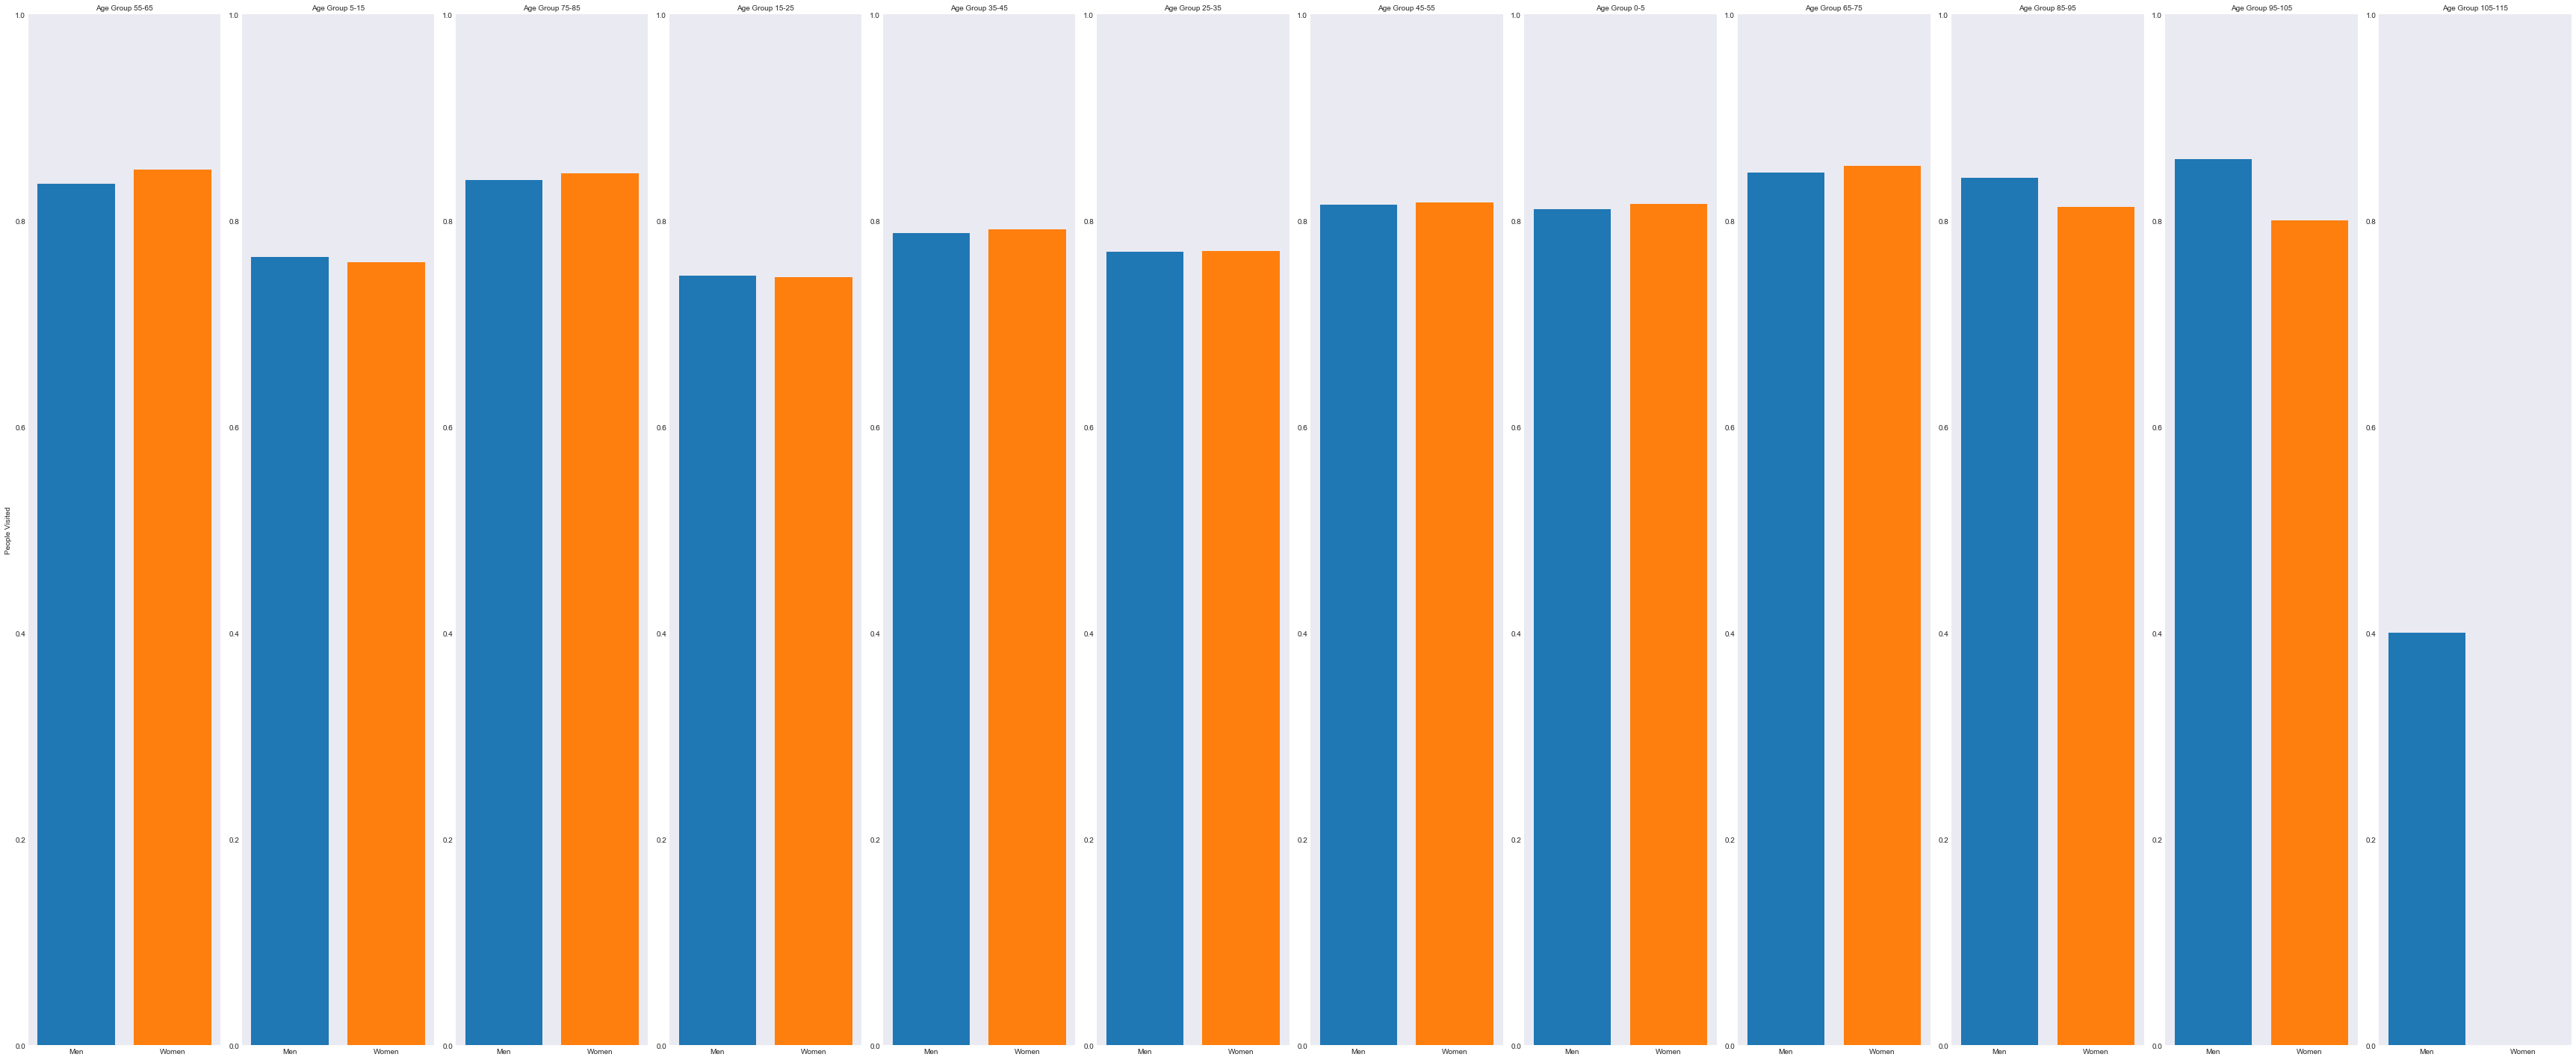

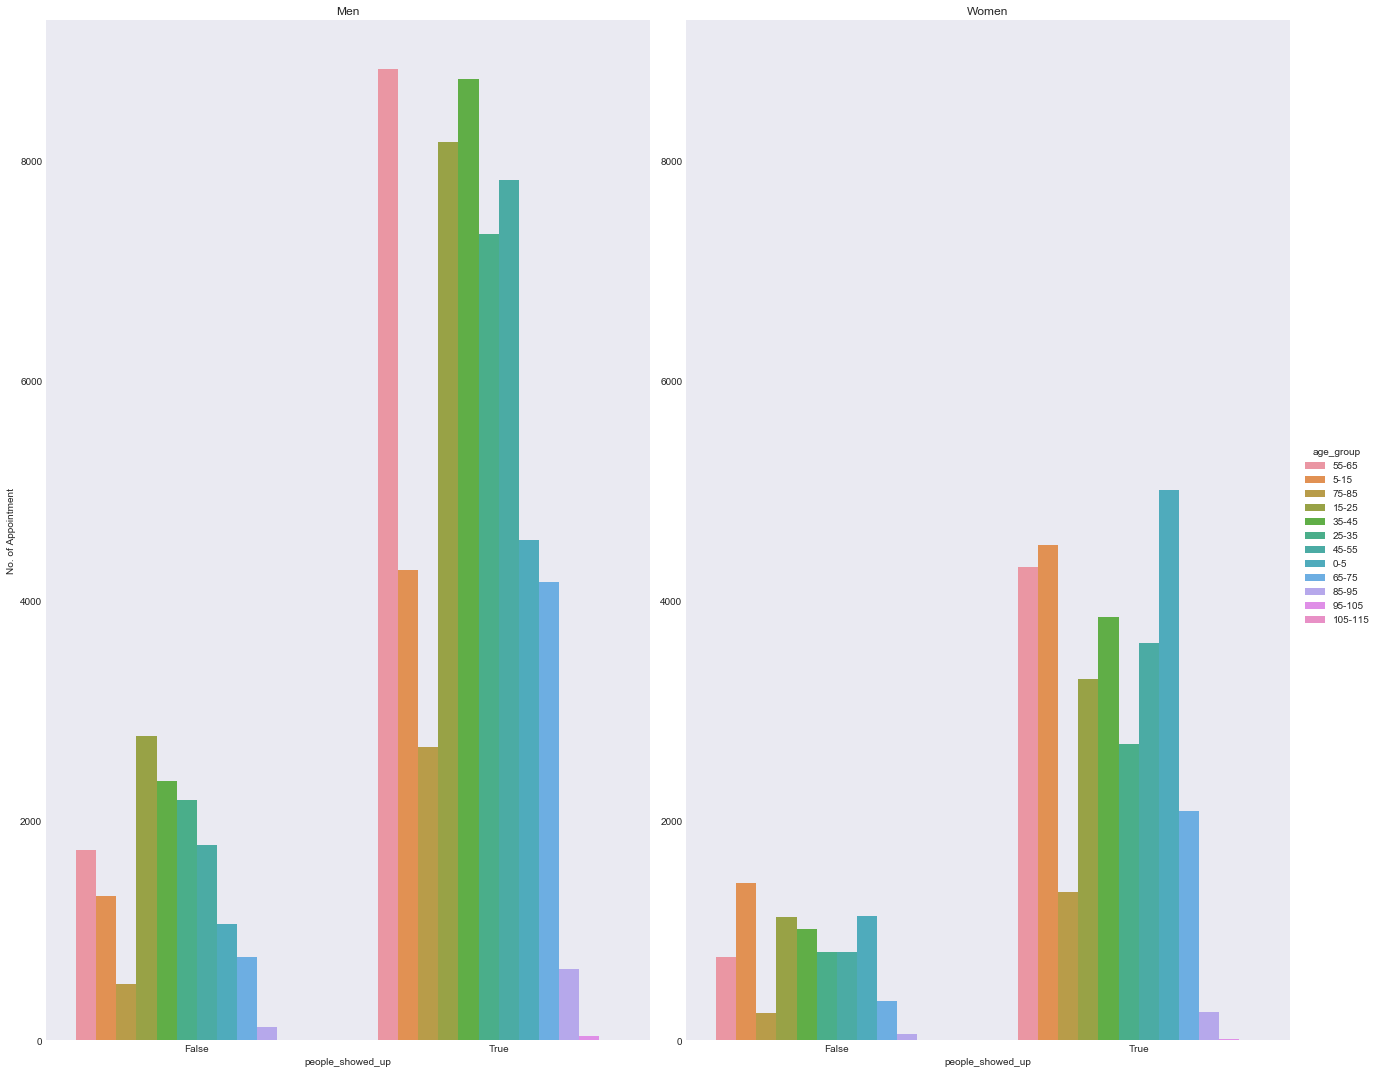

In [155]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Gender", y="people_showed_up", col="age_group", data=clean_appointment_data, 
                   saturation=4, kind="bar", ci=None, size=20, aspect=.2)

# Fix up the labels
(g.set_axis_labels('', 'People Visited')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Age Group {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('people_showed_up', col='Gender', hue='age_group', data=clean_appointment_data, kind='count', size=15, aspect=.6)

# Fix up the labels
(g.set_axis_labels('people_showed_up', 'No. of Appointment')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the raw numbers it would appear that the age group of 65-75 is the most health cautious Age Group because they have the highest percentage of Appointment attendence followed by the Age Group of 55-65 which is just about 1% less than the 65-75 Age Group in the Appointment Attendence.

The Age group with the least percentage of Appointment Attendence is 15-25.

**Note** 105-115 is not the least percentage age group because the number of patients in that Age group are too low. So, the comparision is not possible.

# Question 2 

Did Age, regardless of Gender, determine the patients missing the Appointments ?

Total number of People Who Showed Up 88208 
Total number of People who missed the appointment 22319 
Mean age of people who Showed up 38.0 
Mean age of people who missed the appointment 34.0 
Oldest to show up 115 
Oldest to miss the appointment 115


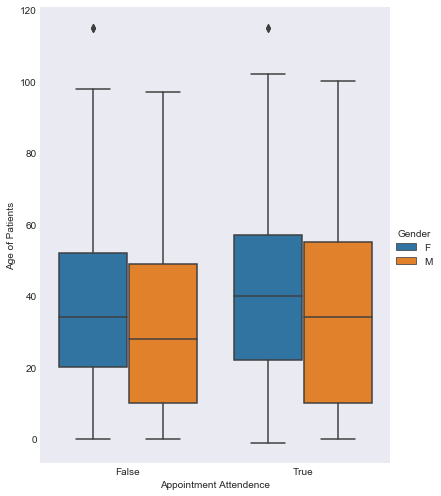

In [157]:
# Find the total number of people who showed up and those who missed their appointments
number_showed_up = clean_appointment_data[clean_appointment_data['people_showed_up'] == True]['people_showed_up'].count()
number_missed = clean_appointment_data[clean_appointment_data['people_showed_up'] == False]['people_showed_up'].count()

# Find the average number of people who showed up and those who missed their appointments
mean_age_showed_up = clean_appointment_data[clean_appointment_data['people_showed_up'] == True]['Age'].mean()
mean_age_missed = clean_appointment_data[clean_appointment_data['people_showed_up'] == False]['Age'].mean()                                            
                                   
# Displaying a few Totals
print 'Total number of People Who Showed Up {} \n\
Total number of People who missed the appointment {} \n\
Mean age of people who Showed up {} \n\
Mean age of people who missed the appointment {} \n\
Oldest to show up {} \n\
Oldest to miss the appointment {}' \
.format(number_showed_up, number_missed, np.round(mean_age_showed_up), 
        np.round(mean_age_missed), oldest_to_showup, oldest_to_miss)

# Graph of age of passengers across sex of those who survived
g = sns.factorplot(x="people_showed_up", y="Age", hue='Gender', data=clean_appointment_data, kind="box", size=7, aspect=.8)

# Fixing the labels
(g.set_axis_labels('Appointment Attendence', 'Age of Patients')
    .set_xticklabels(["False", "True"])
)

Based on the boxplot and the calculated data above, it would appear that:

- Regardless of the Gender, age was **not** a deciding factor in the appointment attendence rate of the Patients
- The number of female who attended the appointment as well as who missed the appointment is more than the number of male

# Question 3

Did women and children preferred to attend their appointments ?

**Assumption:** With 'child' not classified in the data, I'll need to assume a cutoff point. Therefore, I'll be using today's standard of under 18 as those to be considered as a child vs adult.

Category  people_showed_up
Child     0                    5997
          1                   21383
Man       0                    4790
          1                   20416
Woman     0                   11532
          1                   46409
dtype: int64


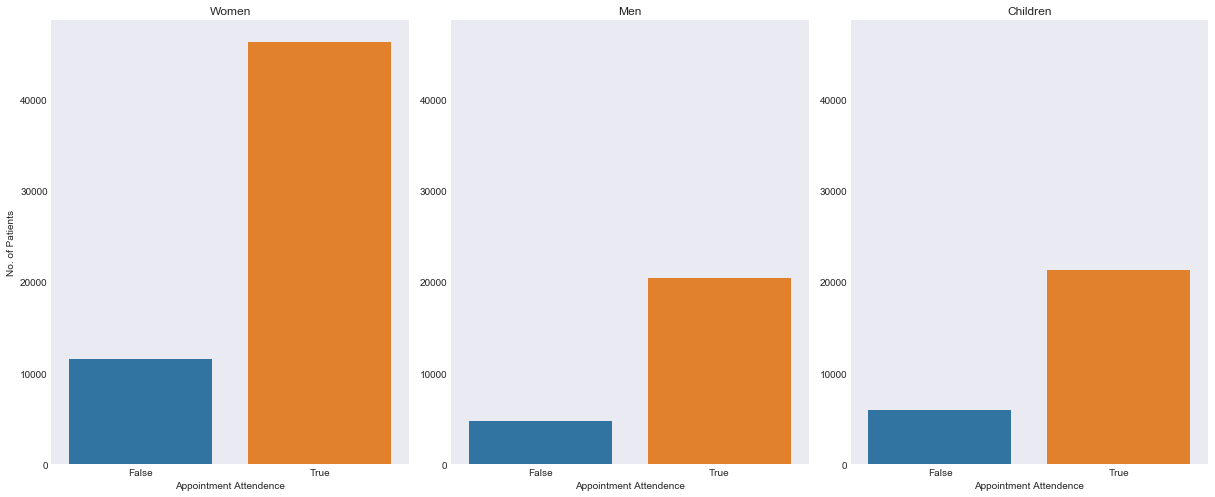

In [159]:
# Create Category and Categorize people
clean_appointment_data.loc[
    ((clean_appointment_data['Gender'] == 'F') &
    (clean_appointment_data['Age'] >= 18)),
    'Category'] = 'Woman'

clean_appointment_data.loc[
    ((clean_appointment_data['Gender'] == 'M') &
    (clean_appointment_data['Age'] >= 18)),
    'Category'] = 'Man'

clean_appointment_data.loc[
    (clean_appointment_data['Age'] < 18),
    'Category'] = 'Child'

# Get the totals grouped by Men, Women and Children
print clean_appointment_data.groupby(['Category', 'people_showed_up']).size()

# Graph - Comapre the number of Men, Women and Children who showed up on their appointments
g = sns.factorplot('people_showed_up', col='Category', data=clean_appointment_data, kind='count', size=7, aspect=0.8)

# Fix up the labels
(g.set_axis_labels('Appointment Attendence', 'No. of Patients')
    .set_xticklabels(['False', 'True'])
)

titles = ['Women', 'Men', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based on the calculated data and the Graphs, it would appear that:
- The appointment attendence of the women is significantly higher than that of the men and children
- The number of Men and children who attended the appointment is almost the same, the difference between the number of men and children is about :-  **967**

# Question 4

Did the Scholarship of the patients helped in the attendence of their appointments?

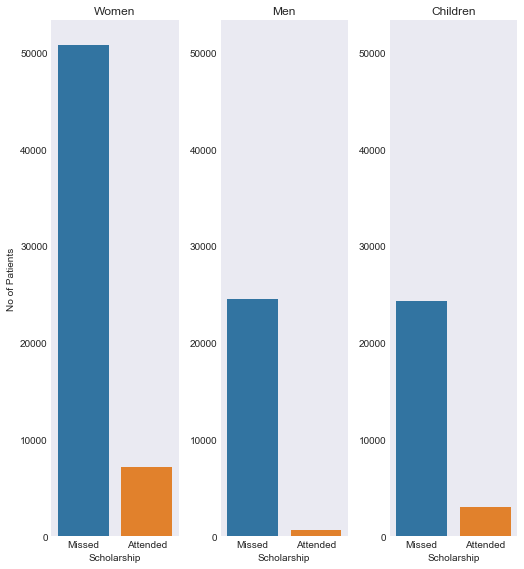

In [141]:
# Determine the number of Man, Woman and Children who had scholarship
man_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Man') &
    (clean_appointment_data['Scholarship'] == 1)]

man_without_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Man') &
    (clean_appointment_data['Scholarship'] == 0)]

woman_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Woman') &
    (clean_appointment_data['Scholarship'] == 1)]

woman_without_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Woman') &
    (clean_appointment_data['Scholarship'] == 0)]

children_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Child') &
    (clean_appointment_data['Scholarship'] == 1)]

children_without_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Child') &
    (clean_appointment_data['Scholarship'] == 0)]

# Graph - Compare how many man, woman and children with or without scholarship attended thier apoointments
g = sns.factorplot('Scholarship', col='Category', data=clean_appointment_data, kind='count', size=8, aspect=0.3)

# Fix up the labels
(g.set_axis_labels('Scholarship', 'No of Patients')
    .set_xticklabels(['Missed', 'Attended'])
)

titles = ['Women', 'Men', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

In [160]:
# Determine the Total Number of Men, Women and Children with Scholarship
total_male_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Man') &
    (clean_appointment_data['Scholarship'] < 2)]

total_female_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Woman') &
    (clean_appointment_data['Scholarship'] < 2)]

total_child_with_scholarship = clean_appointment_data.loc[
    (clean_appointment_data['Category'] == 'Child') &
    (clean_appointment_data['Scholarship'] < 2)]

total_man_with_scholarship = total_male_with_scholarship.Scholarship.count()
total_woman_with_scholarship = total_female_with_scholarship.Scholarship.count()
total_children_with_scholarship = total_child_with_scholarship.Scholarship.count()

# Determine the number of Men, Women and Children with scholarship who Attended the Appointments
man_with_scholarship_attendence = man_with_scholarship.Scholarship.count()
woman_with_scholarship_attendence = woman_with_scholarship.Scholarship.sum()
children_with_scholarship_attendence = children_with_scholarship.Scholarship.sum()

# Determine the Percentage of Men, Women and Children with Scholarship who Attended or Missed the Appointments
pct_man_with_scholarship_attendence = ((float(man_with_scholarship_attendence)/total_man_with_scholarship)*100)
pct_man_with_scholarship_attendence = np.round(pct_man_with_scholarship_attendence,2)

pct_woman_with_scholarship_attendence = ((float(woman_with_scholarship_attendence)/total_woman_with_scholarship)*100)
pct_woman_with_scholarship_attendence = np.round(pct_woman_with_scholarship_attendence,2)

pct_children_with_scholarship_attendence = ((float(children_with_scholarship_attendence)/total_children_with_scholarship)*100)
pct_children_with_scholarship_attendence = np.round(pct_children_with_scholarship_attendence,2)

# Determine the Average Age of Men, Women and Children with Scholarship who Attended or Missed the Appointments
man_with_scholarship_avg_age = np.round(man_with_scholarship.Age.mean())
woman_with_scholarship_avg_age = np.round(woman_with_scholarship.Age.mean())
children_with_scholarship_avg_age = np.round(children_with_scholarship.Age.mean())

# Display Results
print '1. Total number of Men with Scholarship: {}\n\
2. Total number of Women with Scholarship: {}\n\
3. Total number of Children with Scholarship: {}\n\
4. Men with Scholarship who attended the Appointment: {}\n\
5. Women with Scholarship who attended the Appointment: {}\n\
6. Children with Scholarship who attended the Appointment: {}\n\
7. Men with Scholarship who missed the Appointment: {}\n\
8. Women with Scholarship who missed the Appointment: {}\n\
9. Children with Scholarship who missed the Appointment: {}\n\
10. Percentage of Men with Scholarship who attended the Appointment: {}%\n\
11. Percentage of Women with Scholarship who attended the Appointment: {}%\n\
12. Percentage of Children with Scholarship who attended the Appointment: {}%\n\
13. Average Age of Men with Scholarship who attended the Appointment: {}\n\
14. Average Age of Women with Scholarship who attended the Appointment: {}\n\
15. Average Age of Children with Scholarship who attended the Appointment: {}'\
.format(total_man_with_scholarship, total_woman_with_scholarship, total_children_with_scholarship,
       man_with_scholarship_attendence, woman_with_scholarship_attendence, children_with_scholarship_attendence,
       total_man_with_scholarship-man_with_scholarship_attendence, total_woman_with_scholarship-woman_with_scholarship_attendence,
       total_children_with_scholarship-children_with_scholarship_attendence,
       pct_man_with_scholarship_attendence, pct_woman_with_scholarship_attendence, pct_children_with_scholarship_attendence,
       man_with_scholarship_avg_age, woman_with_scholarship_avg_age, children_with_scholarship_avg_age)

1. Total number of Men with Scholarship: 25206
2. Total number of Women with Scholarship: 57941
3. Total number of Children with Scholarship: 27380
4. Men with Scholarship who attended the Appointment: 666
5. Women with Scholarship who attended the Appointment: 7133
6. Children with Scholarship who attended the Appointment: 3062
7. Men with Scholarship who missed the Appointment: 24540
8. Women with Scholarship who missed the Appointment: 50808
9. Children with Scholarship who missed the Appointment: 24318
10. Percentage of Men with Scholarship who attended the Appointment: 2.64%
11. Percentage of Women with Scholarship who attended the Appointment: 12.31%
12. Percentage of Children with Scholarship who attended the Appointment: 11.18%
13. Average Age of Men with Scholarship who attended the Appointment: 43.0
14. Average Age of Women with Scholarship who attended the Appointment: 39.0
15. Average Age of Children with Scholarship who attended the Appointment: 9.0


Based on the Data Analysis above , it would appear that the percentage of women with scholarship i.e **12.31%** is the highest among the percentage of men and children i.e **2.64%**, **11.18%** repectively. 
The differnce between the women with schorlarship attending the appointments is very high about **9.67%** 

However, in the average age the men have the highest age in i.e **43 Years** whereas the average age of women and children attending the appointment is **39 Years** and **9 Years** repectively.

# Conclusion

The results of the data analysis, would appear that Female are more health cautious whereas the health of Men and Children is neglected as they may not be taking their health seriously. Age did not seem to be a major factor. While Men neglected their health the most by skipping thier appointment dates with the Hospital.
Therefore, The Gender is the most important factor in this Data Anaylsis.

# Resources
N/A